In [1]:
import torch

In [2]:
import glob

In [3]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 6608-3FEF

 Directory of C:\Users\HP\Downloads\GR63-FA21\Research

13-10-2021  16:50    <DIR>          .
13-10-2021  16:50    <DIR>          ..
13-10-2021  16:34    <DIR>          .ipynb_checkpoints
13-10-2021  16:50             6,425 DataExploration.ipynb
13-10-2021  16:24    <DIR>          svarma4
13-10-2021  16:24    <DIR>          welby2
13-10-2021  16:24    <DIR>          weustis2
               1 File(s)          6,425 bytes
               6 Dir(s)  100,693,340,160 bytes free


In [4]:
path_to_data = r"C:\Users\HP\Downloads\RWF2000\*"

In [5]:
glob.glob(path_to_data)

['C:\\Users\\HP\\Downloads\\RWF2000\\train',
 'C:\\Users\\HP\\Downloads\\RWF2000\\val']

In [6]:
data_paths = []
for folder in glob.glob(path_to_data):
    for sub_folder in glob.glob(folder+"\*"):
        for file in glob.glob(sub_folder+"\*"):
            print(file)
            data_paths.append(file)

C:\Users\HP\Downloads\RWF2000\train\Fight\-1l5631l3fg_0.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\-1l5631l3fg_1.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\-1l5631l3fg_2.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0H2s9UJcNJ0_0.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0H2s9UJcNJ0_2.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0H2s9UJcNJ0_3.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0H2s9UJcNJ0_4.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0H2s9UJcNJ0_5.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0lHQ2f0d_0.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0lHQ2f0d_1.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0lHQ2f0d_2.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0lHQ2f0d_3.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0NWz-01A2yk_0.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0NWz-01A2yk_1.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0TFi8D8IBg4_1.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\0vasozvJYvk_0.avi
C:\Users\HP\Downloads\RWF2000\train\Fight\_6-B11R9FJ

In [7]:
data_paths

['C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\-1l5631l3fg_0.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\-1l5631l3fg_1.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\-1l5631l3fg_2.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0H2s9UJcNJ0_0.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0H2s9UJcNJ0_2.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0H2s9UJcNJ0_3.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0H2s9UJcNJ0_4.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0H2s9UJcNJ0_5.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0lHQ2f0d_0.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0lHQ2f0d_1.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0lHQ2f0d_2.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0lHQ2f0d_3.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0NWz-01A2yk_0.avi',
 'C:\\Users\\HP\\Downloads\\RWF2000\\train\\Fight\\0NWz-01A2yk_1.avi',
 'C:\\Users\\HP\\D

In [8]:
import torchvision

In [29]:
type(data[0])

torch.Tensor

In [30]:
video_data = data[0]

In [31]:
video_data.shape

torch.Size([150, 360, 640, 3])

In [32]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


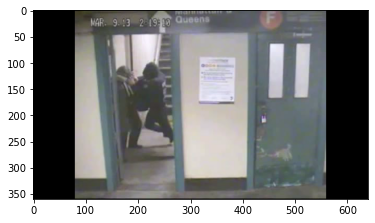

In [35]:
plt.imshow(video_data[50])

In [37]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt



In [81]:
class CustomImageDataset(Dataset):
    def __init__(self, train):
         # TODO
            # if train == True, only load from RWF2000/train/* 
            # if train == False, only load from RWF2000/val/*
        path_to_data = r"C:\Users\HP\Downloads\RWF2000\*"
        self.data_paths = []
        
        for folder in glob.glob(path_to_data):
            print(folder)
            # if train is true, then do not load the val folder
            #  if train is false, then do not load the train folder
            if train == ("val" in folder):
                continue
            for sub_folder in glob.glob(folder+"\*"):
                for file in glob.glob(sub_folder+"\*"):
                    self.data_paths.append(file)
                        # check how many frames the video is
            
                    
       # self.some_variable = some_value
        
        
    def __len__(self):
        return len(self.data_paths)*150

    def __getitem__(self, idx):
        # idx is in range [0, number_of_paths*150)
        # data_paths has [0, number_of_paths)
        data_path_idx = idx//150
        frame_number = idx%150
        
        # read the video at the corresponding index (idx)
        path = self.data_paths[data_path_idx]
        label = not "NonFight" in path  # if NoFight in path
        data = torchvision.io.read_video(path)
        
        return data[0][frame_number], label

In [79]:
training_dataset = CustomImageDataset(True)
testing_dataset = CustomImageDataset(False)

C:\Users\HP\Downloads\RWF2000\train
C:\Users\HP\Downloads\RWF2000\val
C:\Users\HP\Downloads\RWF2000\train
C:\Users\HP\Downloads\RWF2000\val


In [80]:
print(len(training_dataset))
print(len(testing_dataset))

2550
0


In [74]:
for item in my_class:
    print(item[0].shape, item[1])

torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True
torch.Size([360, 640, 3]) True


KeyboardInterrupt: 

In [49]:
my_class.x = 7

In [39]:
some_list = [1,2,3]

In [43]:
some_list.__getitem__(1) 

2